In [2]:
from main import ParallelGraphComputingSystem
import mesa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

In [53]:
params = {"num_agents": range(8, 14, 2), "performance": 12, "performance_diff": 3, 
          "new_tasks": 130, "new_tasks_diff": 5, "graph_density": 0.7,  
          "gamma_step": 1}

results = mesa.batch_run(
    ParallelGraphComputingSystem,
    parameters=params,
    iterations=2,
    max_steps=40000,
    number_processes=None,
    data_collection_period=1000,
    display_progress=True,
)

  0%|          | 0/6 [00:00<?, ?it/s]

In [54]:
results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'num_agents', 'performance',
       'performance_diff', 'new_tasks', 'new_tasks_diff', 'graph_density',
       'gamma_step', 'Main_relation', 'AgentID', 'Tasks', 'Relation', 'State',
       'Performance'],
      dtype='object')


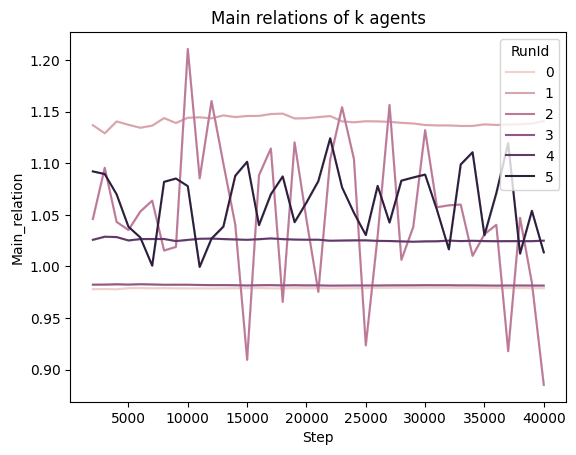

In [55]:
results_filtered = results_df[(results_df.Step % 1000 == 0) & (results_df.Step > 1000)]
multiple_agents_relation = results_filtered[["RunId", "Step", "Main_relation"]].reset_index(
    drop = True
)
g = sns.lineplot(data=multiple_agents_relation, x="Step", y="Main_relation", hue="RunId")
g.set(title="Main relations of k agents");

In [59]:
for i in range(8, 13, 2):
    for j in range (1, 2, 1):
        one_episode_wealth = results_df[(results_df.num_agents == i) & (results_df.iteration == j)]

        print(one_episode_wealth.to_string(
                index=False, columns=["Step", "AgentID", "Tasks", 
                                      "Performance", "Relation", "State", "Main_relation"], max_rows=i * 2))
        print("-----------")

 Step  AgentID  Tasks  Performance     Relation    State  Main_relation
    0        0      0           13     0.000000 0.000000       0.000000
    0        1      0            9     0.000000 0.000000       0.000000
    0        2      0            9     0.000000 0.000000       0.000000
    0        3      0           13     0.000000 0.000000       0.000000
    0        4      0           12     0.000000 0.000000       0.000000
    0        5      0           12     0.000000 0.000000       0.000000
    0        6      0           14     0.000000 0.000000       0.000000
    0        7      0           13     0.000000 0.000000       0.000000
  ...      ...    ...          ...          ...      ...            ...
40000        0 114510           13  8808.538462 3.445014       0.981537
40000        1  66600            9  7399.888889 2.720429       0.981537
40000        2  54498            9  6055.333333 2.847521       0.981537
40000        3 131892           13 10145.000000 1.187873       0